In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CommonFunc import *
%matplotlib inline

In [31]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

test.info()

In [32]:
ExchangeDataAll(train, test)

c:\work\Kazuki\python\ai\kaggle\howmuch\CommonFunc.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.any(check == data.iat[idx,colidx]) == False :


#HstgramOutput(train, "GarageCars")

#HstgramOutput(train, "MSZoning")

In [0]:
#NAを中央値変換
setfillNa(train, test, "GarageYrBlt", train["GarageYrBlt"].median())
setfillNa(train, test, "LotFrontage", train["LotFrontage"].median())
setfillNa(train, test, "MasVnrArea", train["MasVnrArea"].median())
setfillNa(train, test, "BsmtFinSF1", train["BsmtFinSF1"].median())
setfillNa(train, test, "GarageArea", train["GarageArea"].median())
setfillNa(train, test, "TotalBsmtSF", train["TotalBsmtSF"].median())

#NAを一番多い分類に変換
setfillNa(train, test, "MSZoning", train["MSZoning"].mode()[0])
setfillNa(train, test, "GarageCars", train["GarageCars"].mode()[0])

#NAをその他に分類
setfillNa(train, test, "Alley", 0)
setfillNa(train, test, "BsmtQual", 0)
setfillNa(train, test, "Fence", 0)
setfillNa(train, test, "FireplaceQu", 0)
setfillNa(train, test, "KitchenQual", 0)

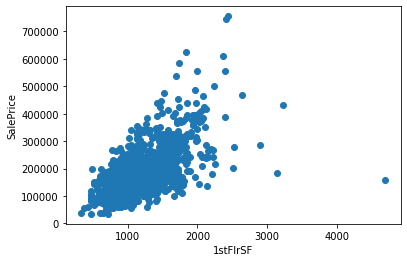

In [34]:
GraphOutput(train, '1stFlrSF', 'SalePrice')

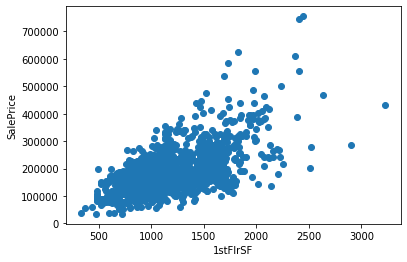

In [35]:
#外れ値の除外
train = train.drop(train[(train['1stFlrSF']>3000) & (train['SalePrice']<200000)].index)
GraphOutput(train, '1stFlrSF', 'SalePrice')

In [36]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,0,1,1,1,...,0,NaN,0,NaN,0,2,2008,1,1,208500
1,2,20,1,80.0,9600,1,0,1,1,1,...,0,NaN,0,NaN,0,5,2007,1,1,181500
2,3,60,1,68.0,11250,1,0,2,1,1,...,0,NaN,0,NaN,0,9,2008,1,1,223500
3,4,70,1,60.0,9550,1,0,2,1,1,...,0,NaN,0,NaN,0,2,2006,1,2,140000
4,5,60,1,84.0,14260,1,0,2,1,1,...,0,NaN,0,NaN,0,12,2008,1,1,250000


In [37]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,5,80.0,11622,1,0,1,1,1,...,120,0,NaN,1,NaN,0,6,2010,1,1
1,1462,20,1,81.0,14267,1,0,2,1,1,...,0,0,NaN,0,2,12500,6,2010,1,1
2,1463,60,1,74.0,13830,1,0,2,1,1,...,0,0,NaN,1,NaN,0,3,2010,1,1
3,1464,60,1,78.0,9978,1,0,2,1,1,...,0,0,NaN,0,NaN,0,6,2010,1,1
4,1465,120,1,43.0,5005,1,0,2,4,1,...,144,0,NaN,0,NaN,0,1,2010,1,1


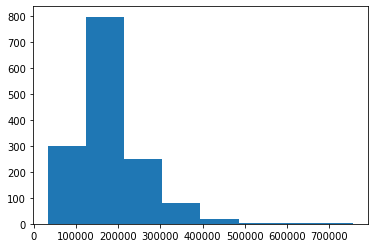

In [38]:
HstgramOutput(train,"SalePrice")

In [39]:
#正規分布にするために対数変換
LogConvert(train,"SalePrice")

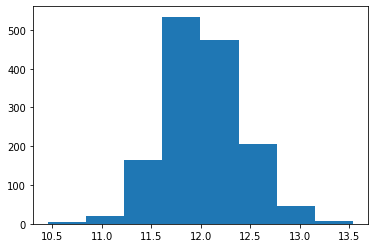

In [40]:
HstgramOutput(train,"SalePrice_Log")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Log
495,496,30,3,60.0,7879,1,0,1,1,1,...,NaN,2,NaN,0,11,2009,1,2,34900,10.460242
916,917,20,3,50.0,9000,1,0,1,1,1,...,NaN,0,NaN,0,10,2006,1,2,35311,10.471950
968,969,50,2,50.0,5925,1,0,1,1,1,...,NaN,2,NaN,0,5,2009,1,2,37900,10.542706
533,534,20,1,50.0,5000,1,0,1,3,1,...,NaN,0,NaN,0,1,2007,1,1,39300,10.578980
30,31,70,3,50.0,8500,1,2,1,1,1,...,NaN,1,NaN,0,7,2008,1,1,40000,10.596635


In [41]:
#CV用にソートしてCV用の分類を作成
train = train.sort_values('SalePrice')
validata = 0
datanum = train.shape[0]
np_vali = np.zeros(datanum)
for idx in range(datanum):
    np_vali[idx] = validata
    validata = validata + 1
    validata = validata % 5

train['vali_value'] = np_vali.astype(int)
print(train['vali_value'])

495     0
916     1
968     2
533     3
30      4
       ..
803     3
898     4
1169    0
1182    1
691     2
Name: vali_value, Length: 1458, dtype: int32


In [42]:
#学習用のデータの抽出
train_data = train.values
#1回目
#x_tra = train_data[:,[1,11,13,14,17,18,19,20,27,28,29,41,43,44,46,49,51,54,56,65,66,67,68,70]]
FeatureData = [1,2,3,6,11,13,14,17,18,19,20,26,27,28,29,30,34,38,41,43,44,46,49,51,53,54,56,57,59,61,62,65,66,67,68,70,73]
x_tra_name = train.columns.values[FeatureData]
x_tra = train_data[:,FeatureData]

exchange_log = True
colidx = 0
if exchange_log == False:
    #対数変換なしの場合
    colidx = train.columns.get_loc("SalePrice")
else :
    #対数変換ありの場合
    colidx = train.columns.get_loc("SalePrice_Log")

y_tra = train_data[:,[colidx,colidx]]

#価格取得用のデータの抽出
test_data = test.values
#xs_test = test_data[:, [1,11,13,14,17,18,19,20,27,28,29,41,43,44,46,49,51,54,56,65,66,67,68,70]]
xs_test = test_data[:, FeatureData]

print(x_tra_name)
print(x_tra)
print(y_tra)
print(y_tra.dtype)
print(x_tra.shape)
print(y_tra.shape)


['MSSubClass' 'MSZoning' 'LotFrontage' 'Alley' 'LandSlope' 'Condition1'
 'Condition2' 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd'
 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtFinSF1'
 'TotalBsmtSF' 'CentralAir' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'FullBath'
 'BedroomAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Fireplaces' 'FireplaceQu'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'PavedDrive' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' 'ScreenPorch' 'Fence']
[[30 3 60.0 ... 115 0 2]
 [20 3 50.0 ... 0 0 0]
 [50 2 50.0 ... 0 0 2]
 ...
 [60 1 118.0 ... 0 0 0]
 [60 1 160.0 ... 0 0 1]
 [60 1 104.0 ... 0 0 0]]
[[10.460242108190519 10.460242108190519]
 [10.47194980911048 10.47194980911048]
 [10.542706391070517 10.542706391070517]
 ...
 [13.345506928718539 13.345506928718539]
 [13.521139497361697 13.521139497361697]
 [13.534473028231162 13.534473028231162]]
object
(1458, 37)
(1458, 2)


Training done using Random Forest


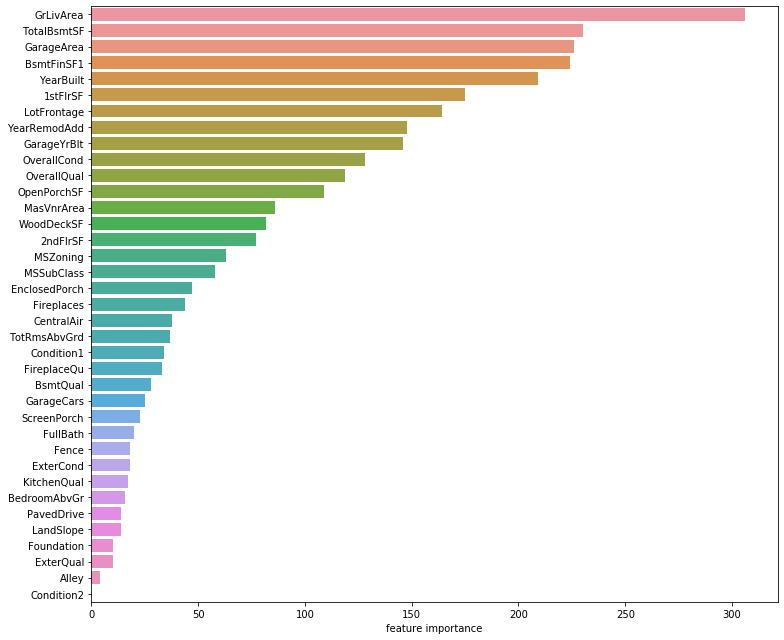

In [43]:
#影響あるデータをグラフ化((LightGBM))
ImportantFeature(x_tra, y_tra, x_tra_name)

In [44]:
#CV実施(LightGBM)
CVExe(x_tra, y_tra, train['vali_value'].values, True)


RMSLE:0.13495363276311498
RMSLE:0.1186719460047396
RMSLE:0.1352170640012357
RMSLE:0.13811034558898969
RMSLE AVE:0.13173824708952


In [45]:
#ランダムフォレストでCV、パラメータ検索
"""
#引数チェック
from sklearn.ensemble import RandomForestRegressor as RFR 
from sklearn.model_selection import train_test_split, GridSearchCV

rg = RFR(n_jobs=-1, random_state=2525)

search_params = {
    'n_estimators'      : [10, 20, 30, 50, 100, 200, 300],
    'max_features'      : ['auto'],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
#    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
#    'max_features'      : [i for i in range(1,train.shape[1])],
 
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(x_tra, y_tra)
print(gsr.best_score_)
Y_pred = gsr.predict(xs_test)
"""

"\n#引数チェック\nfrom sklearn.ensemble import RandomForestRegressor as RFR \nfrom sklearn.model_selection import train_test_split, GridSearchCV\n\nrg = RFR(n_jobs=-1, random_state=2525)\n\nsearch_params = {\n    'n_estimators'      : [10, 20, 30, 50, 100, 200, 300],\n    'max_features'      : ['auto'],\n    'random_state'      : [2525],\n    'n_jobs'            : [1],\n    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],\n    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]\n}\n#    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],\n#    'max_features'      : [i for i in range(1,train.shape[1])],\n \ngsr = GridSearchCV(\n    RFR(),\n    search_params,\n    cv = 3,\n    n_jobs = -1,\n    verbose=True\n)\n \ngsr.fit(x_tra, y_tra)\nprint(gsr.best_score_)\nY_pred = gsr.predict(xs_test)\n"

In [46]:
"""
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
"""
#普通にランラムフォレスト
"""
rg.fit(x_tra,y_tra)
Y_pred = rg.predict(xs_test)
"""

'\nrg.fit(x_tra,y_tra)\nY_pred = rg.predict(xs_test)\n'

In [47]:
#LightGBM実行
"""
import lightgbm as lgb
# LightGBM
model = lgb.LGBMRegressor(n_estimators=10000,learning_rate=0.0005, n_jobs=-1)
model.fit(x_tra, y_tra[:,0])
Y_pred = model.predict(xs_test)
"""

'\nimport lightgbm as lgb\n# LightGBM\nmodel = lgb.LGBMRegressor(n_estimators=10000,learning_rate=0.0005, n_jobs=-1)\nmodel.fit(x_tra, y_tra[:,0])\nY_pred = model.predict(xs_test)\n'

In [48]:
#LightGBMで引数チェック
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
model = lgb.LGBMRegressor(n_estimators=10000,learning_rate=0.0005, n_jobs=-1)

grid_param ={'n_estimators':[1000,2000],'max_depth':[4,8,16],'num_leaves':[31,15,7,3],'learning_rate':[0.1,0.05,0.01]}
 
gsr = GridSearchCV(
    model,
    grid_param,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(x_tra, y_tra[:,0])
print(gsr.best_score_)
Y_pred = gsr.predict(xs_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s


KeyboardInterrupt: 

In [0]:
Y_pred

In [0]:
if exchange_log == True:
    #対数変換している場合、指数に戻す。
    Y_pred = np.exp(Y_pred)
Y_pred

In [0]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["Id", "SalePrice"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(float)):
        writer.writerow([pid, survived])